In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pb
from math import pi
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import math
from scipy.stats import norm

In [3]:
normal = norm(0,1)
t = -2
x = -1
size = 1000
w0_range = np.linspace(-2, 2, size)
w1_range = np.linspace(-2, 2, size)


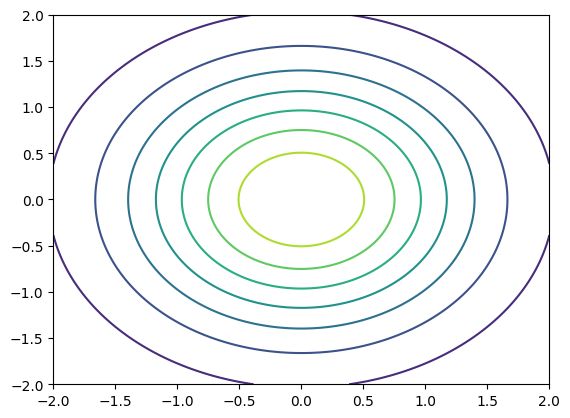

In [4]:

W0, W1 = np.meshgrid(w0_range, w1_range)

#print(np.shape(W0))
#print(W0)
#print(W1)

def likelihood(t, x, W0, W1):
    return np.exp(-0.5 *((t - W0*x - W1)/0.2)**2)/(math.sqrt(2*pi)*0.2)
    
    

prior = normal.pdf(W0) * normal.pdf(W1)
plt.figure()
plt.contour(W0, W1, prior)
##plt.scatter(normal.pdf(W0), normal.pdf(W1))

plt.show()



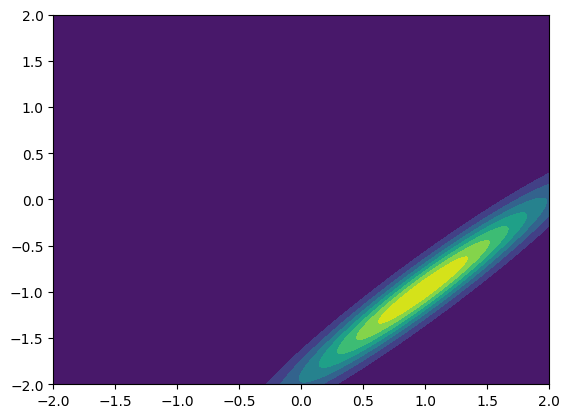

In [5]:
### task 1.2 ####
posterior = likelihood(t, x, W0, W1) * prior

plt.figure()
plt.contourf(W0, W1, posterior)

plt.show()

[1 1]
[[ 1.   -1.  ]
 [ 1.   -0.99]
 [ 1.   -0.98]
 [ 1.    1.  ]
 [ 1.    0.99]
 [ 1.    0.  ]
 [ 1.    0.75]]
2
[[-8.09172008  1.21544546]
 [-2.38260811  4.91288986]
 [-1.72072881  5.90620647]
 [-5.16542244  1.98922608]
 [-2.85427567 -1.73325414]]


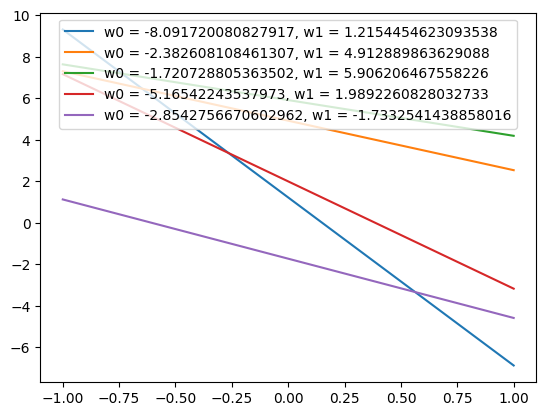

In [6]:
### task 1.3 ####
alpha = 1 / 0.2
beta = 0.2
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]

print([1, -1]*np.transpose([1, -1]))

x_vec = data_x
t_vec = data_t
ones = np.ones(len(x_vec))
np.transpose([ones, x_vec]), [ones, x_vec]
#print(np.matmul([ones, x_vec],np.transpose([ones, x_vec])))

print(np.transpose([ones, x_vec]))
# print(np.matmul(np.transpose([ones, x_vec]), t_vec))

def create_samples(t_vec, x_vec, samples):
    ones = np.ones(len(x_vec))
    S = np.identity(2)*alpha + beta*np.matmul([ones, x_vec], np.transpose([ones, x_vec]))
    M = beta*S*np.matmul(np.transpose([ones, x_vec]), t_vec)
    return np.random.multivariate_normal(M, S, samples)

x_vec = data_x
t_vec = data_t
print(np.matmul(np.transpose([1, -1]), [1,-1]))
ones = np.ones(len(x_vec))
S = np.identity(2)*alpha + beta * np.matmul(np.transpose([1, -1]), [1,-1])
M = beta*np.matmul(S,np.transpose([1, -1]))*-2


#samples = create_samples(data_t, data_x, 5)
samples = np.random.multivariate_normal(M, S, 5)
print(samples)

w0 = []
w1 = []
for i in samples:
    w0.append(i[0])
    w1.append(i[1])


x_axis = np.linspace(-1,1, 200)

y = []
plt.figure()
for i in range(5): 
    y = w0[i]*x_axis + w1[i]
    plt.plot(x_axis, y, label= f"w0 = {w0[i]}, w1 = {w1[i]}")


plt.legend(loc='upper center')
plt.show()



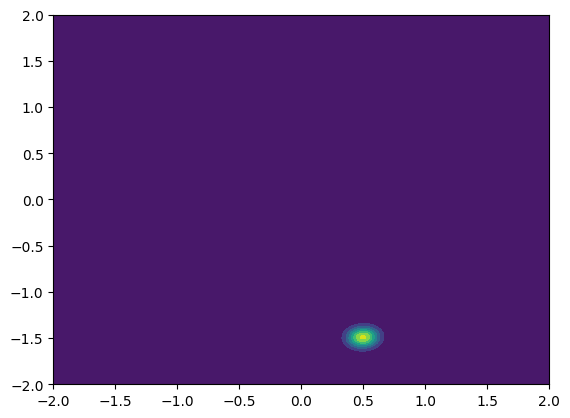

In [7]:
## task 1.4 ###
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]


def calc_posterior(data_t, data_x, w0, w1, prior, length):
    posterior = likelihood(data_t[0], data_x[0], w0, w1) * prior
    for i in range(length):
        if i > 0:
            posterior *= likelihood(data_t[i], data_x[i], w0, w1)
    return posterior


new_posterior = calc_posterior(data_t, data_x, W0, W1, prior, 7)

plt.contourf(W0, W1, new_posterior)
plt.show()

Task 2

In [262]:
#####task 2.1 #####
sigma = 0.1
size = 300
x0 = np.linspace(-1, 1, size)
x1 = np.linspace(-2, 2, size)
#    w2  w1   w0
W = [0, 1.5, -0.8] 


w0_range = np.linspace(-2, 2, size)
w1_range = np.linspace(-2, 2, size)
w2_range = np.linspace(-2, 2,  size)

W0, W1, W2= np.meshgrid(w0_range, w1_range, w2_range)
normal = norm(0, sigma)

st_normal = norm(0, 1)
prior = st_normal.pdf(W0) * st_normal.pdf(W1) * st_normal.pdf(W2)

In [263]:
## Maximum likelihood approach

def generate_data(x0, x1, W, sigma):
    w0 = W[0]
    w1 = W[1]
    w2 = W[2]
    return w0 + w1*x0 + w2*(x1**2) + np.random.normal(0,sigma)

data = generate_data(x0, x1, W, sigma)

data_vec = [data]
training_size = size
training_data = data[0:training_size]
training_x0 = np.linspace(-1, 1, training_size)
training_x1 = np.linspace(-2, 2, training_size)

ones = np.ones(training_size)


phi = np.transpose([ones, x0, x1**2])

## Gamla phi_t 
# phi_t = np.transpose([ones, data, data**2])

phi_t = np.matmul([ones, x0, x1**2], np.transpose(data_vec))
inv_phiTphi = np.linalg.inv(np.matmul(np.transpose(phi), phi))
W_ml = np.matmul(inv_phiTphi, phi_t)


#phi_t


#print((np.matmul(np.transpose(phi), phi)))




#print(W_ml)
#print(np.shape(W_ml))
x_0 = np.linspace(-3, 3, training_size)
X_mat = [x_0, x0, x1]
#print(X_mat)

w0 = W_ml[0]
w1 = W_ml[1]
w2 = W_ml[2]


def calc_beta_inv(W_ml, x_0, x0, x1, training_data):
    w0 = W_ml[0]
    w1 = W_ml[1]
    w2 = W_ml[2]
    res_vec = 0

    for i in range(len(training_data)):
        
        res_vec += (training_data[i] - w0*x_0[i] + w1*x0[i] + w2*(x1[i]**2))**2
        
    return res_vec/len(training_data)


    
print(1 / calc_beta_inv(W_ml, x_0, x0, x1, training_data))

#beta_inv = (training_data - np.matmul(np.transpose(W_ml), ))

#print(np.shape(W_ml))


[0.08984853]


In [264]:
## Bayesian linear regression approach

#W0, W1, W2= np.meshgrid(w0_range, w1_range, w2_range)

st_normal = norm(0, 1)
#prior = st_normal.pdf(W0) * st_normal.pdf(W1) * st_normal.pdf(W2)



def likelihood(training_data, W, x0, x1):
    w0 = W[0]
    w1 = W[1]
    w2 = W[2]
    return np.exp(-0.5 *((training_data - w0 + w1*x0 + w2*(x1**2))/sigma)**2)/(math.sqrt(2*pi)*sigma)


posterior = [likelihood(training_data, W, x0, x1)] * prior
alpha = 1/sigma
beta = sigma

def create_samples_multi(data_vec, x0, x1, samples):
    ones = np.ones(len(x0))
    S = np.identity(3)*alpha + beta*np.matmul([ones, training_x0, training_x1**2], np.transpose([ones, training_x0, training_x1**2]))
    M = beta*np.matmul(S, np.matmul([ones, training_x0, training_x1**2], np.transpose(data_vec)))
    print(np.shape(M))
    print(np.shape(S))
    M = np.squeeze(M)
    return np.random.multivariate_normal(M, S, samples)
ones = np.ones(len(x0))
samples = 5
print(create_samples_multi(data_vec, x0, x1, samples))

(3, 1)
(3, 3)
[[-4362.31430654   305.1983612  -9538.96693949]
 [-4369.43652507   298.11726252 -9540.5815546 ]
 [-4376.71133573   305.81307769 -9549.58583558]
 [-4382.59958217   305.281239   -9550.29911311]
 [-4361.74572476   305.79097351 -9538.38199778]]
